In [230]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
raw = pd.read_csv('data/covtype.csv')

#From covertype.info: 
    
 First digit:  climatic zone             Second digit:  geologic zones
                1.  lower montane dry                   1.  alluvium
                2.  lower montane                       2.  glacial
                3.  montane dry                         3.  shale
                4.  montane                             4.  sandstone
                5.  montane dry and montane             5.  mixed sedimentary
                6.  montane and subalpine               6.  unspecified in the USFS ELU Survey
                7.  subalpine                           7.  igneous and metamorphic
                8.  alpine                              8.  volcanic

        The third and fourth ELU digits are unique to the mapping unit 
        and have no special meaning to the climatic or geologic zones.   

In [92]:
climate_zone = ['none-zero-place-holder', 'lower montane dry','lower montane','montane dry', 'montane','montane dry and montane','montane and subalpine','subalpine','alpine']
geologic_zone = ['none-zero-place-holder','alluvium','glacial','shale','sandstone','mixed sedimentary','unspecified in the USFS ELU Survey', 'ingeous and metamorphic','volcanic']


In [178]:
soil_type_decoding = pd.read_csv('data/soil_type_details.txt', sep="\t")
soil_type_decoding.columns=['index','elu_code','none','description']
soil_type_decoding = soil_type_decoding[['index','elu_code','description']]
soil_type_decoding['decoding'] = soil_type_decoding['description'] 
soil_type_decoding[['name','decoding']] = soil_type_decoding.decoding.str.split('-',1,expand=True)

In [188]:
soil_type_decoding['climate_zone_code'] = (soil_type_decoding['elu_code']/1000).astype('int')
soil_type_decoding['climate_zone'] = soil_type_decoding['climate_zone_code'].apply(lambda x: climate_zone[x])
soil_type_decoding['geo_zone_code'] = (soil_type_decoding['elu_code']%1000/100).astype('int')
soil_type_decoding['geo_zone'] = soil_type_decoding['geo_zone_code'].apply(lambda x: geologic_zone[x])
soil_type_decoding['index'] = soil_type_decoding['index'].astype('int')

In [189]:
soil_type_decoding.dtypes

index                 int64
elu_code              int64
description          object
decoding             object
name                 object
climate_zone_code     int64
climate_zone         object
geo_zone_code         int64
geo_zone             object
dtype: object

In [95]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [206]:
def undummy(d):
    return d.dot(d.columns)
raw['soil'] = raw.filter(regex='^Soil_Type').pipe(undummy).str.split('Soil_Type').apply(lambda x: x[1])
raw['wilderness'] = raw.filter(regex='^Wilderness_Area').pipe(undummy).str.split('Wilderness_Area').apply(lambda x: x[1])

decode_cover = ["none", "Spruce/Fir", "Lodgepole Pine","Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas Fir", "Krummholz"]
raw['cover_type_code']=raw['Cover_Type'].copy()
raw['cover_type']=raw['cover_type_code'].apply(lambda x: decode_cover[x])

In [98]:
raw.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [223]:
raw2 = raw[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','wilderness','soil','cover_type_code','cover_type']]
raw2.columns = ['elevation', 'aspect', 'slope', 'h_water',
       'v_water', 'h_road',
       'shade_9', 'shade_noon', 'shade_3',
       'h_fire','wilderness','soil_type','cover_type_code','cover_type']
raw2['soil_type'] = raw2.soil_type.astype('int')
raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   elevation        581012 non-null  int64 
 1   aspect           581012 non-null  int64 
 2   slope            581012 non-null  int64 
 3   h_water          581012 non-null  int64 
 4   v_water          581012 non-null  int64 
 5   h_road           581012 non-null  int64 
 6   shade_9          581012 non-null  int64 
 7   shade_noon       581012 non-null  int64 
 8   shade_3          581012 non-null  int64 
 9   h_fire           581012 non-null  int64 
 10  wilderness       581012 non-null  object
 11  soil_type        581012 non-null  int64 
 12  cover_type_code  581012 non-null  int64 
 13  cover_type       581012 non-null  object
dtypes: int64(12), object(2)
memory usage: 62.1+ MB


/var/folders/9k/83m77rxs5835tnj2rh39wf3h0000gn/T/ipykernel_21334/1491699253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw2['soil_type'] = raw2.soil_type.astype('int')


In [337]:
df = pd.merge(raw2, soil_type_decoding[['index','description','decoding','name','climate_zone','geo_zone']], left_on='soil_type', right_on='index')
df['soil_type']=df['soil_type'].astype('object')

In [338]:
display(df.columns)
df = df[['elevation', 'aspect', 'slope', 'h_water', 'v_water', 'h_road',
       'shade_9', 'shade_noon', 'shade_3', 'h_fire', 'wilderness', 'soil_type',
       'cover_type_code','cover_type', 'description', 'decoding', 'name',
       'climate_zone', 'geo_zone']]
df.column = ['elevation', 'aspect', 'slope', 'h_water', 'v_water', 'h_road',
       'shade_9', 'shade_noon', 'shade_3', 'h_fire', 'wilderness', 'soil_type',
       'cover_type_code','cover_type', 'soil_description', 'soil_decoding', 'soil_name',
       'climate_zone', 'geo_zone']


Index(['elevation', 'aspect', 'slope', 'h_water', 'v_water', 'h_road',
       'shade_9', 'shade_noon', 'shade_3', 'h_fire', 'wilderness', 'soil_type',
       'cover_type_code', 'cover_type', 'index', 'description', 'decoding',
       'name', 'climate_zone', 'geo_zone'],
      dtype='object')

/var/folders/9k/83m77rxs5835tnj2rh39wf3h0000gn/T/ipykernel_21334/680081204.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column = ['elevation', 'aspect', 'slope', 'h_water', 'v_water', 'h_road',


In [339]:
df['slope_direction'] =  df['aspect'].apply(lambda x: (((x+45)%360)/90)).astype('int').replace({0:"north", 1:"east", 2:"south",3:"west"})

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581012 entries, 0 to 581011
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   elevation        581012 non-null  int64 
 1   aspect           581012 non-null  int64 
 2   slope            581012 non-null  int64 
 3   h_water          581012 non-null  int64 
 4   v_water          581012 non-null  int64 
 5   h_road           581012 non-null  int64 
 6   shade_9          581012 non-null  int64 
 7   shade_noon       581012 non-null  int64 
 8   shade_3          581012 non-null  int64 
 9   h_fire           581012 non-null  int64 
 10  wilderness       581012 non-null  object
 11  soil_type        581012 non-null  object
 12  cover_type_code  581012 non-null  int64 
 13  cover_type       581012 non-null  object
 14  description      581012 non-null  object
 15  decoding         523883 non-null  object
 16  name             581012 non-null  object
 17  climate_zo

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

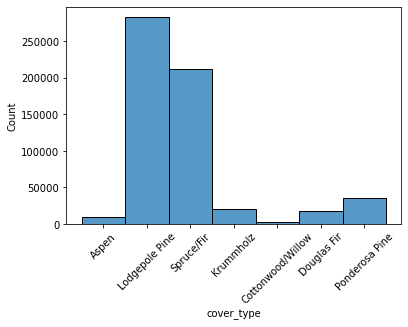

In [231]:
ax = sns.histplot(x="cover_type", data=df)
plt.xticks(rotation=45)
#Spruce and Lodgepole Pine are most common 
#Cottonwood is rarest and Aspen


<AxesSubplot:xlabel='elevation', ylabel='Count'>

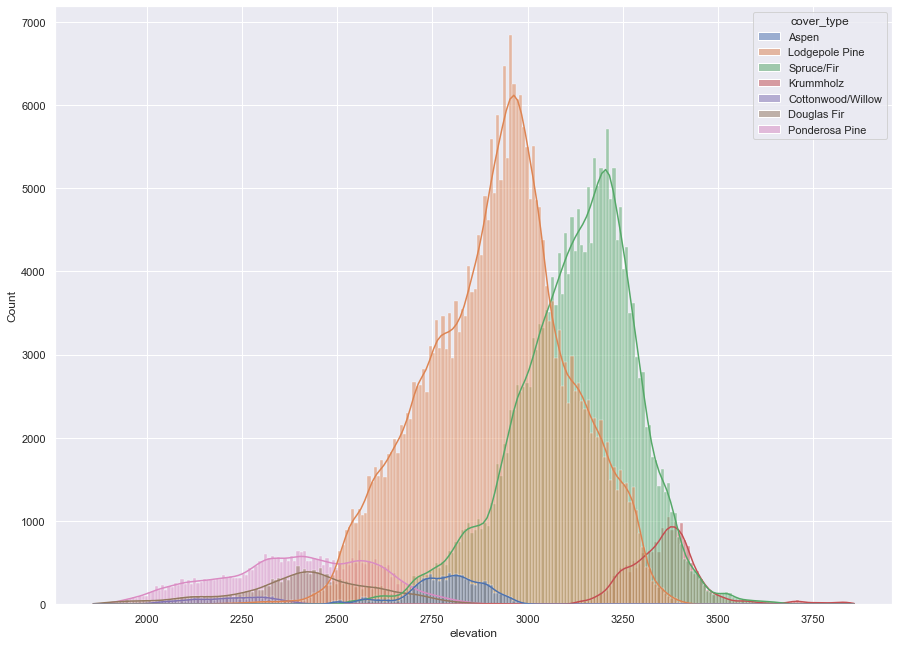

In [233]:
sns.set(rc={'figure.figsize':(15,11)})
sns.histplot(data=df, x="elevation", hue='cover_type',kde=True)
#Elevation looks like a good feature - they differ a bit for each group. 

<AxesSubplot:xlabel='cover_type', ylabel='elevation'>

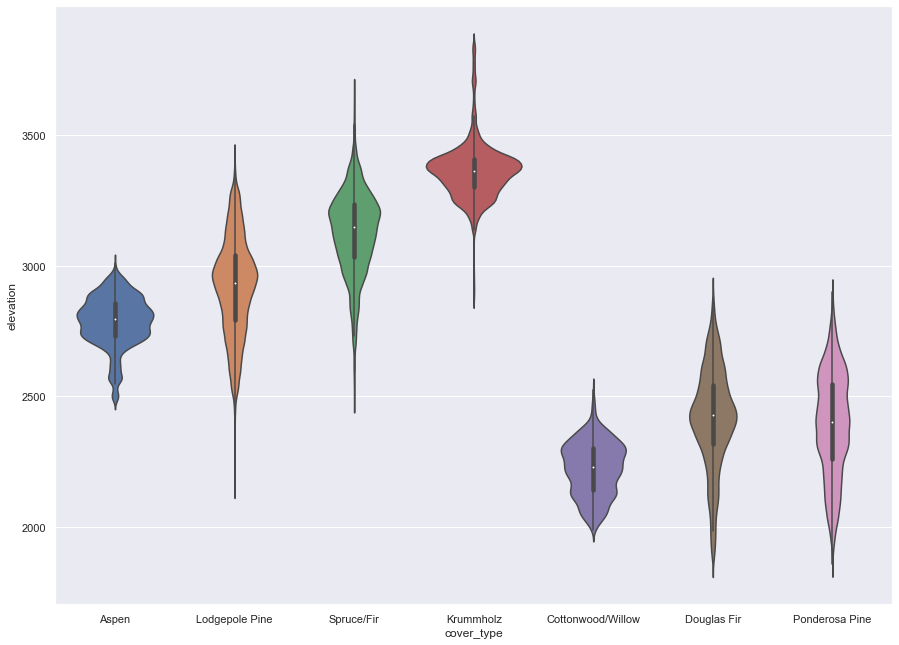

In [242]:
sns.violinplot(data=df, x="cover_type", y="elevation")

<AxesSubplot:xlabel='cover_type', ylabel='aspect'>

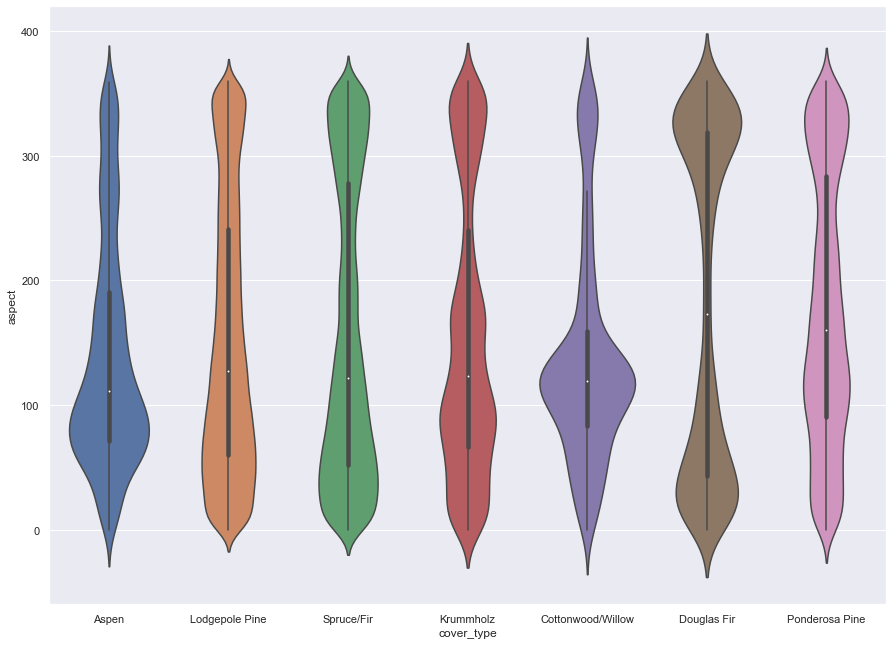

In [243]:
sns.violinplot(data=df, x="cover_type", y="aspect")

<AxesSubplot:xlabel='slope', ylabel='Count'>

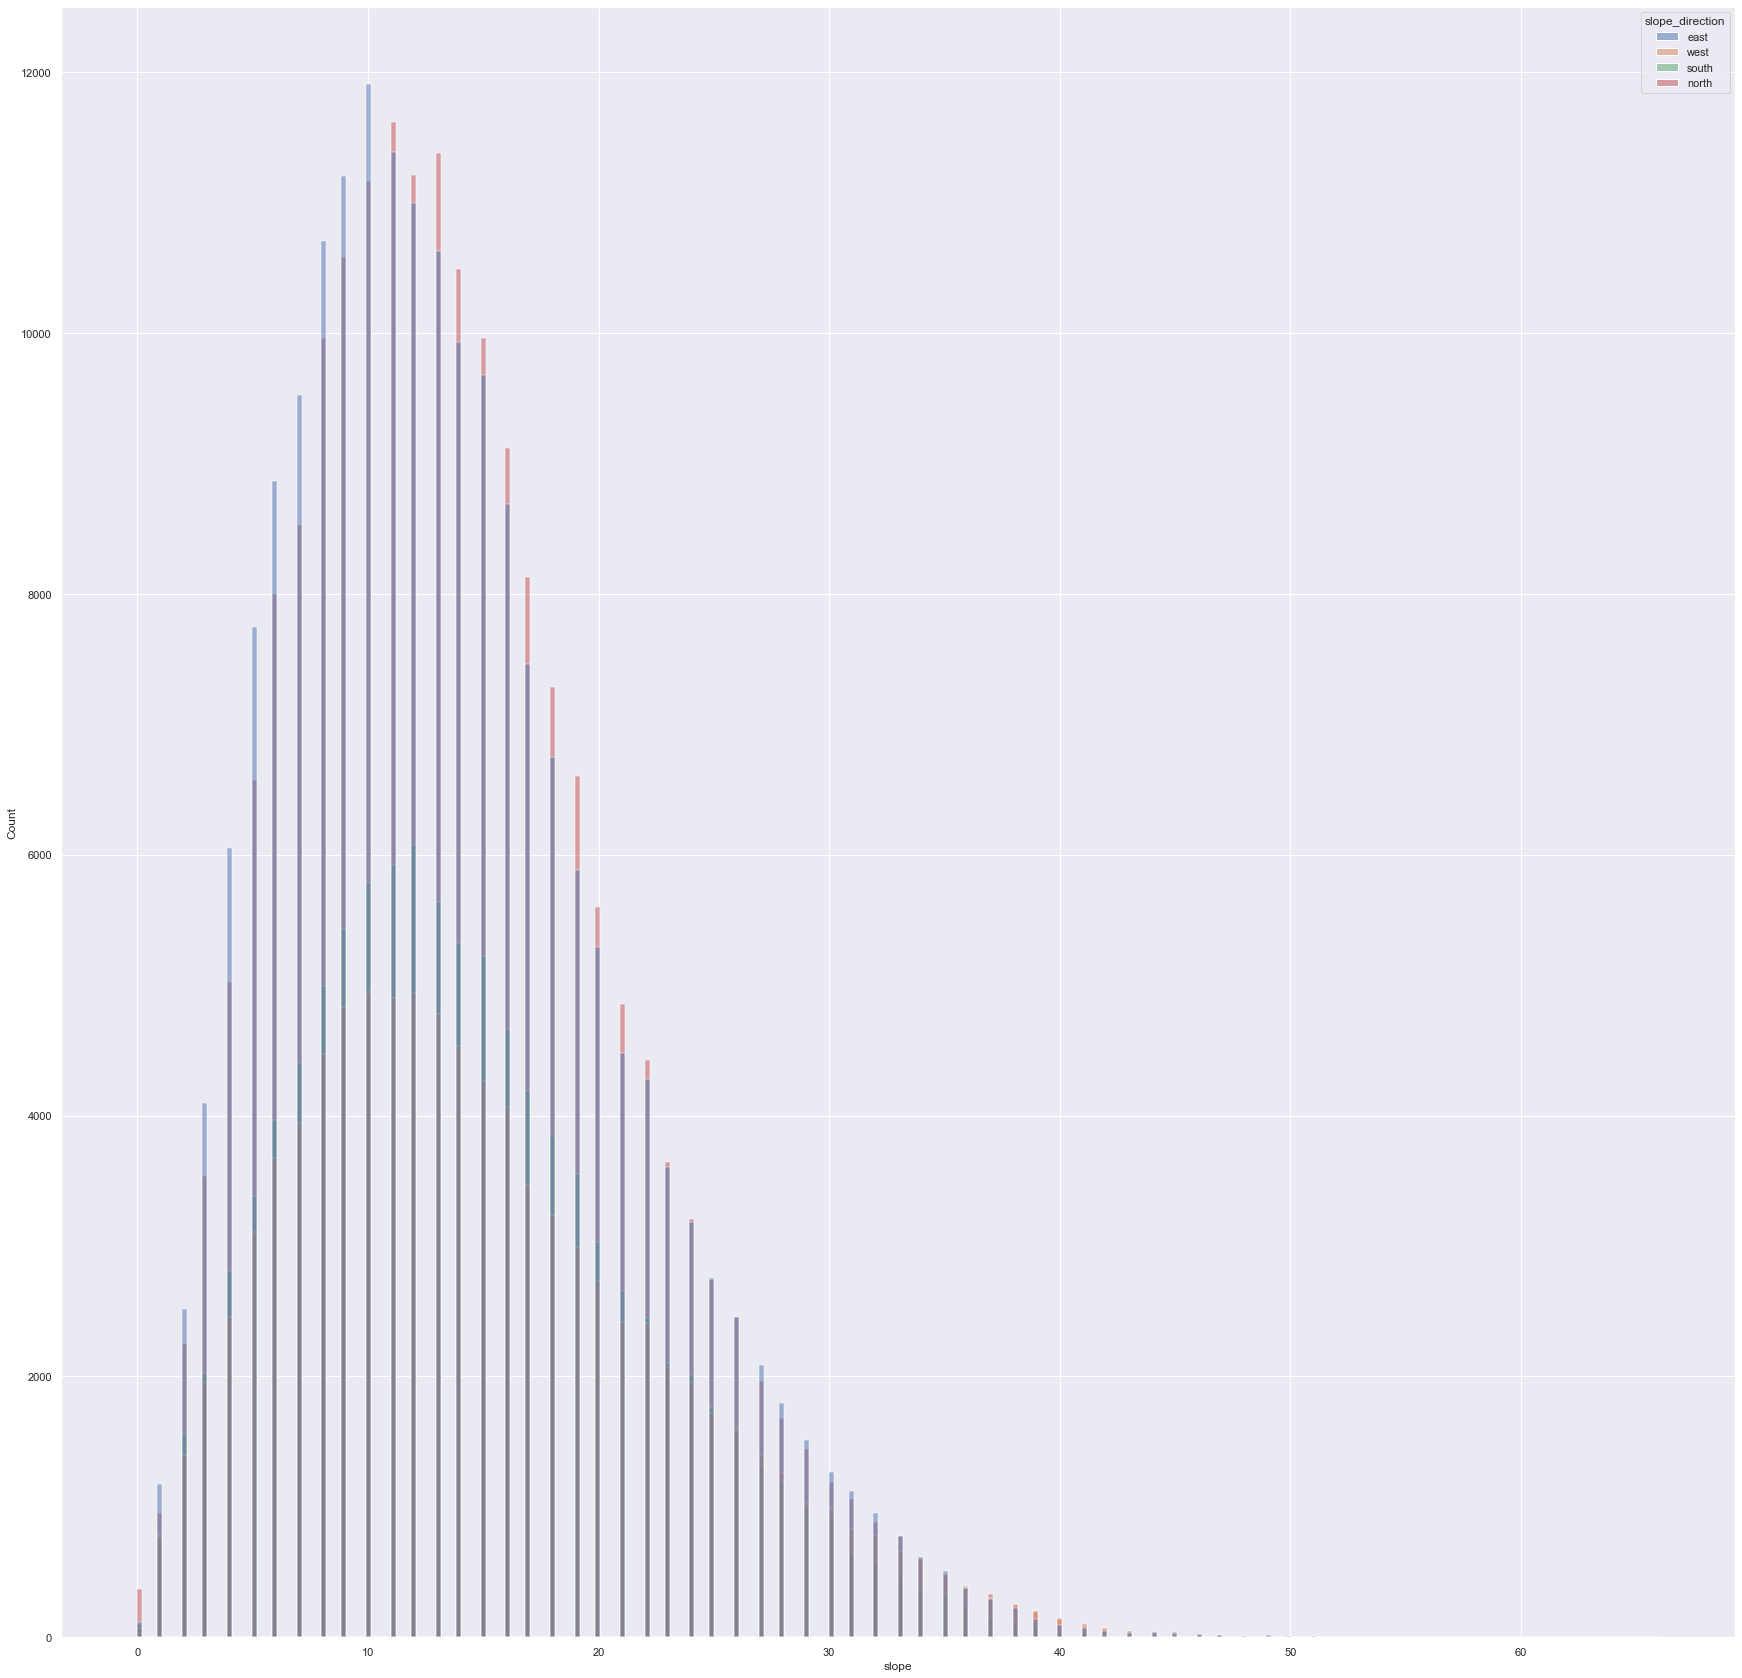

In [292]:
sns.histplot(data=df, hue="slope_direction", x="slope")
#So slope isnt a great indicator by itself it looks like 
#not for direction, not for cover type 

<AxesSubplot:xlabel='soil_type', ylabel='elevation'>

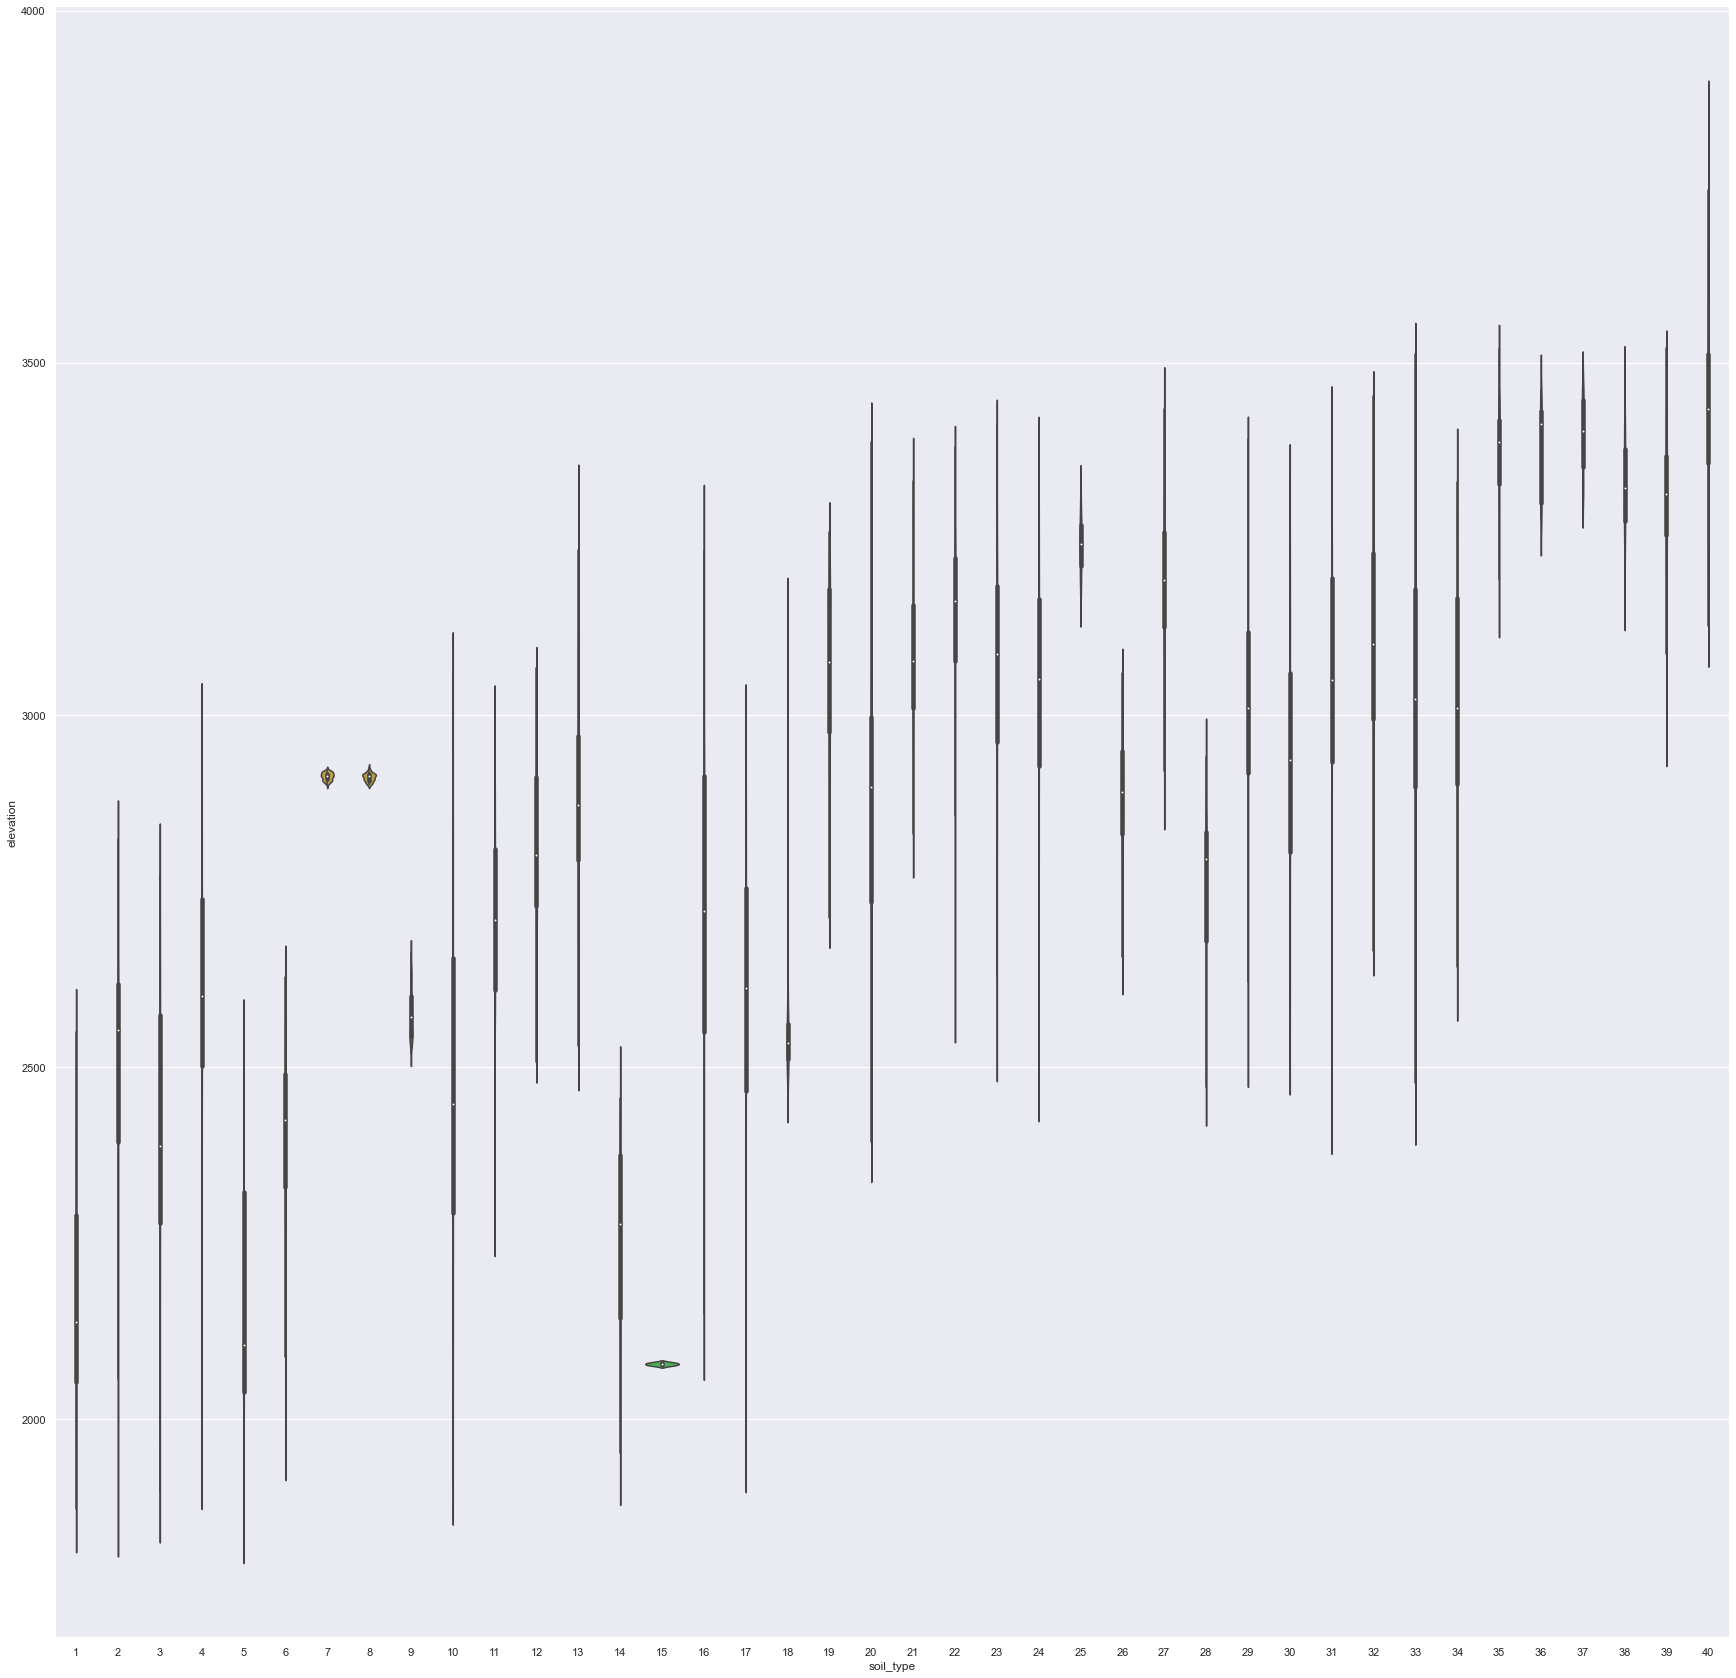

In [293]:
sns.violinplot(data=df, x="soil_type", y="elevation")

,elevation,slope,aspect,h_water,v_water,h_road,shade_9,shade_noon,shade_3,h_fire,wilderness,soil_type,cover_type_code,cover_type,description,decoding,name,climate_zone,geo_zone
0,1859,12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1860,13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1861,14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1863,17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1866,14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='elevation', ylabel='slope'>

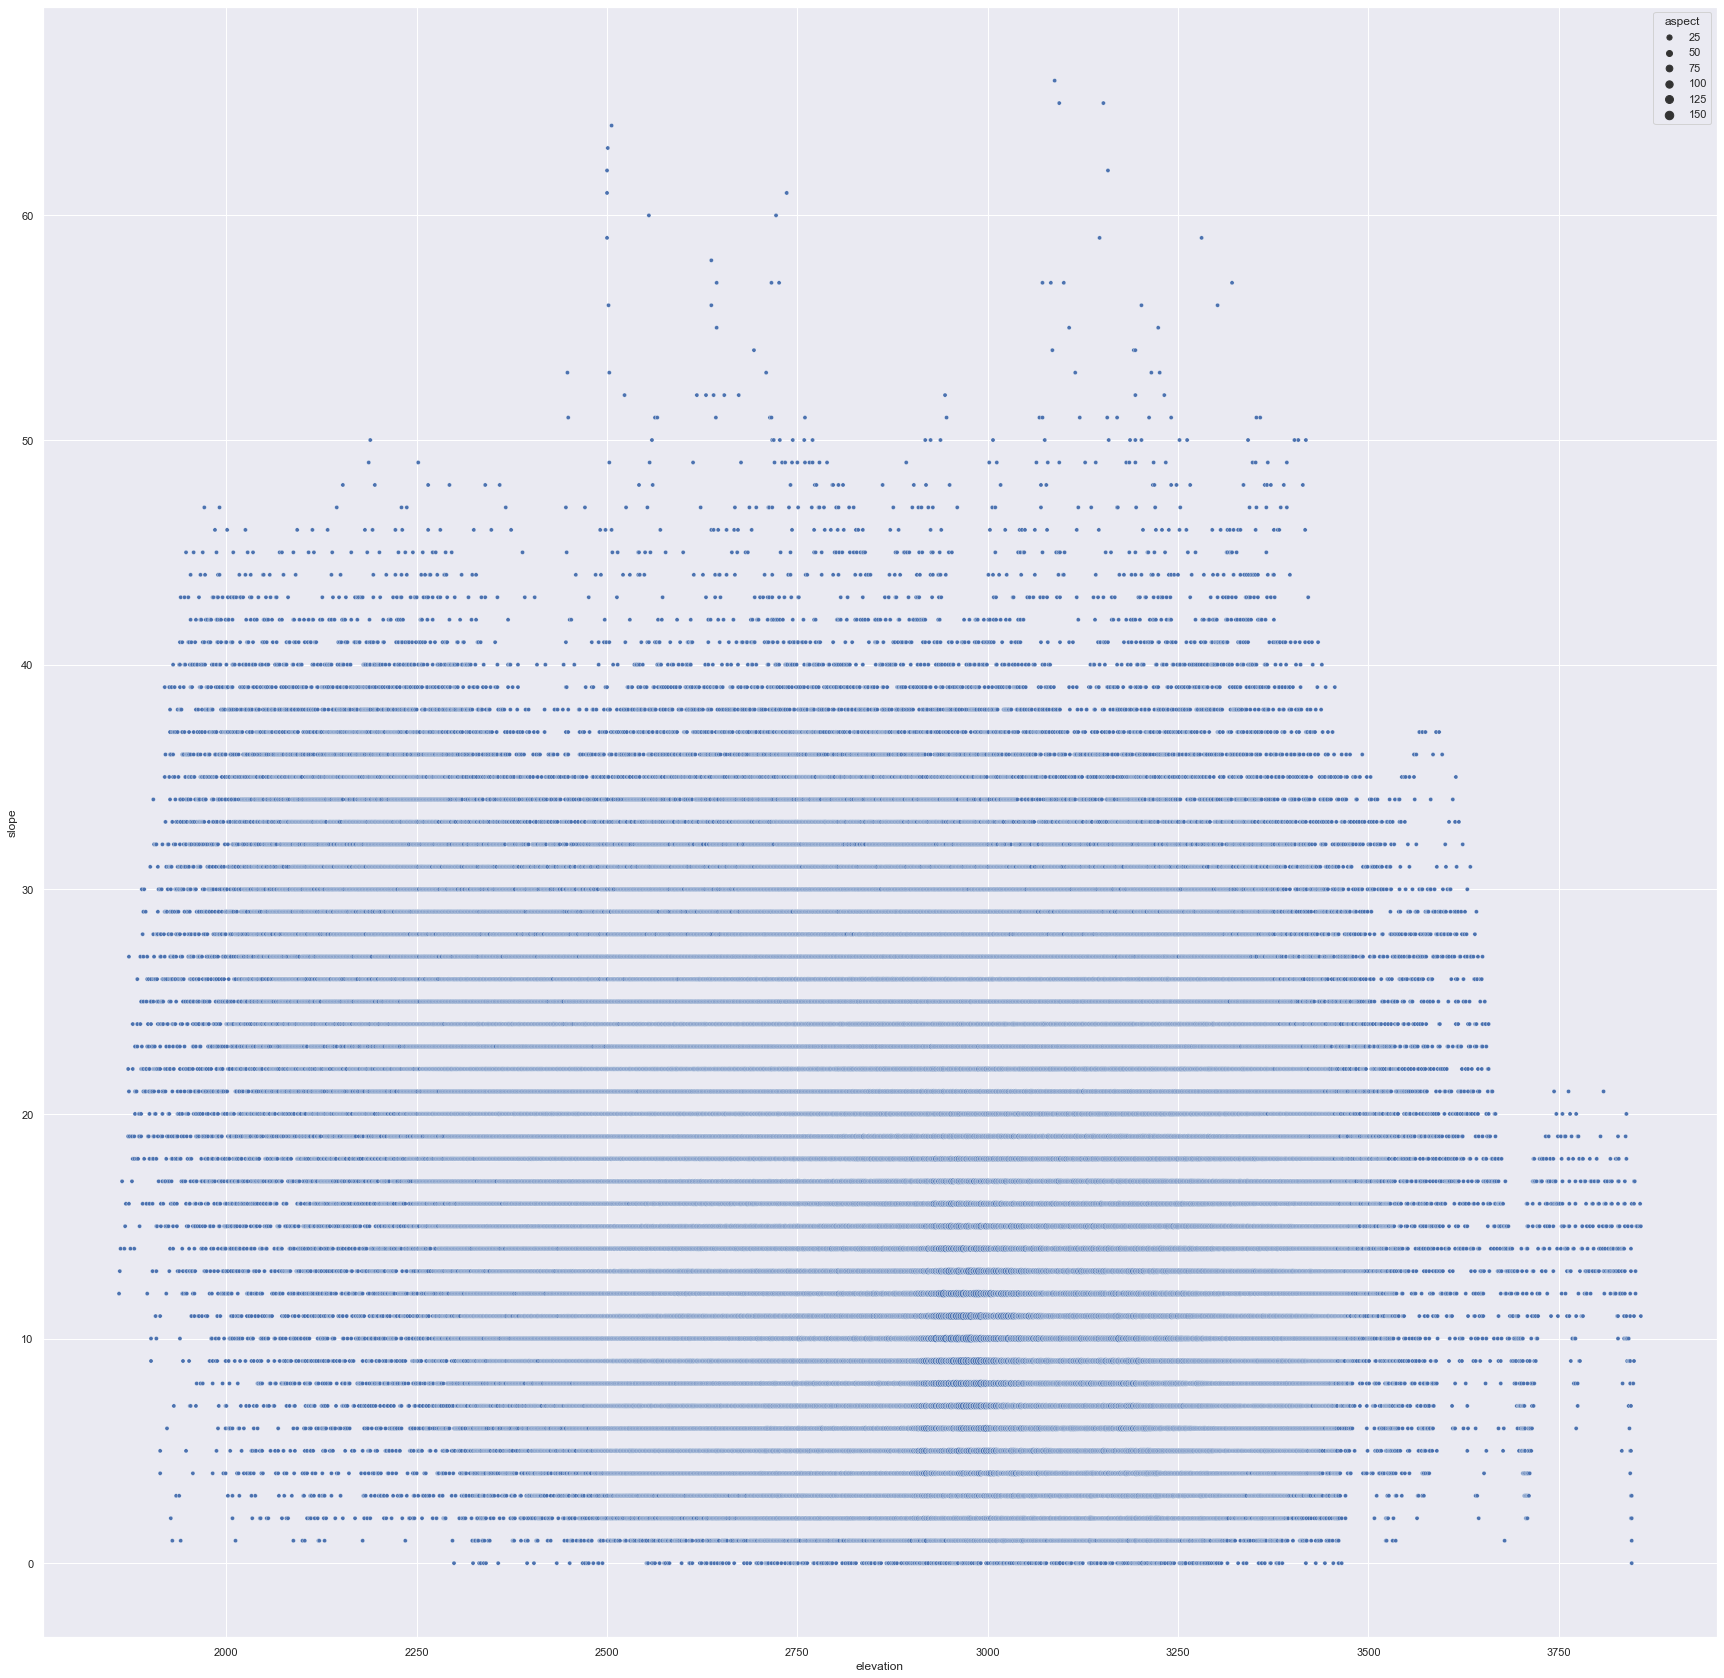

In [266]:
b = df.groupby(['elevation','slope'],as_index=False).count()
display(b.head())
sns.scatterplot(data=b, x='elevation', y='slope', size='aspect')


<AxesSubplot:xlabel='slope_direction', ylabel='elevation'>

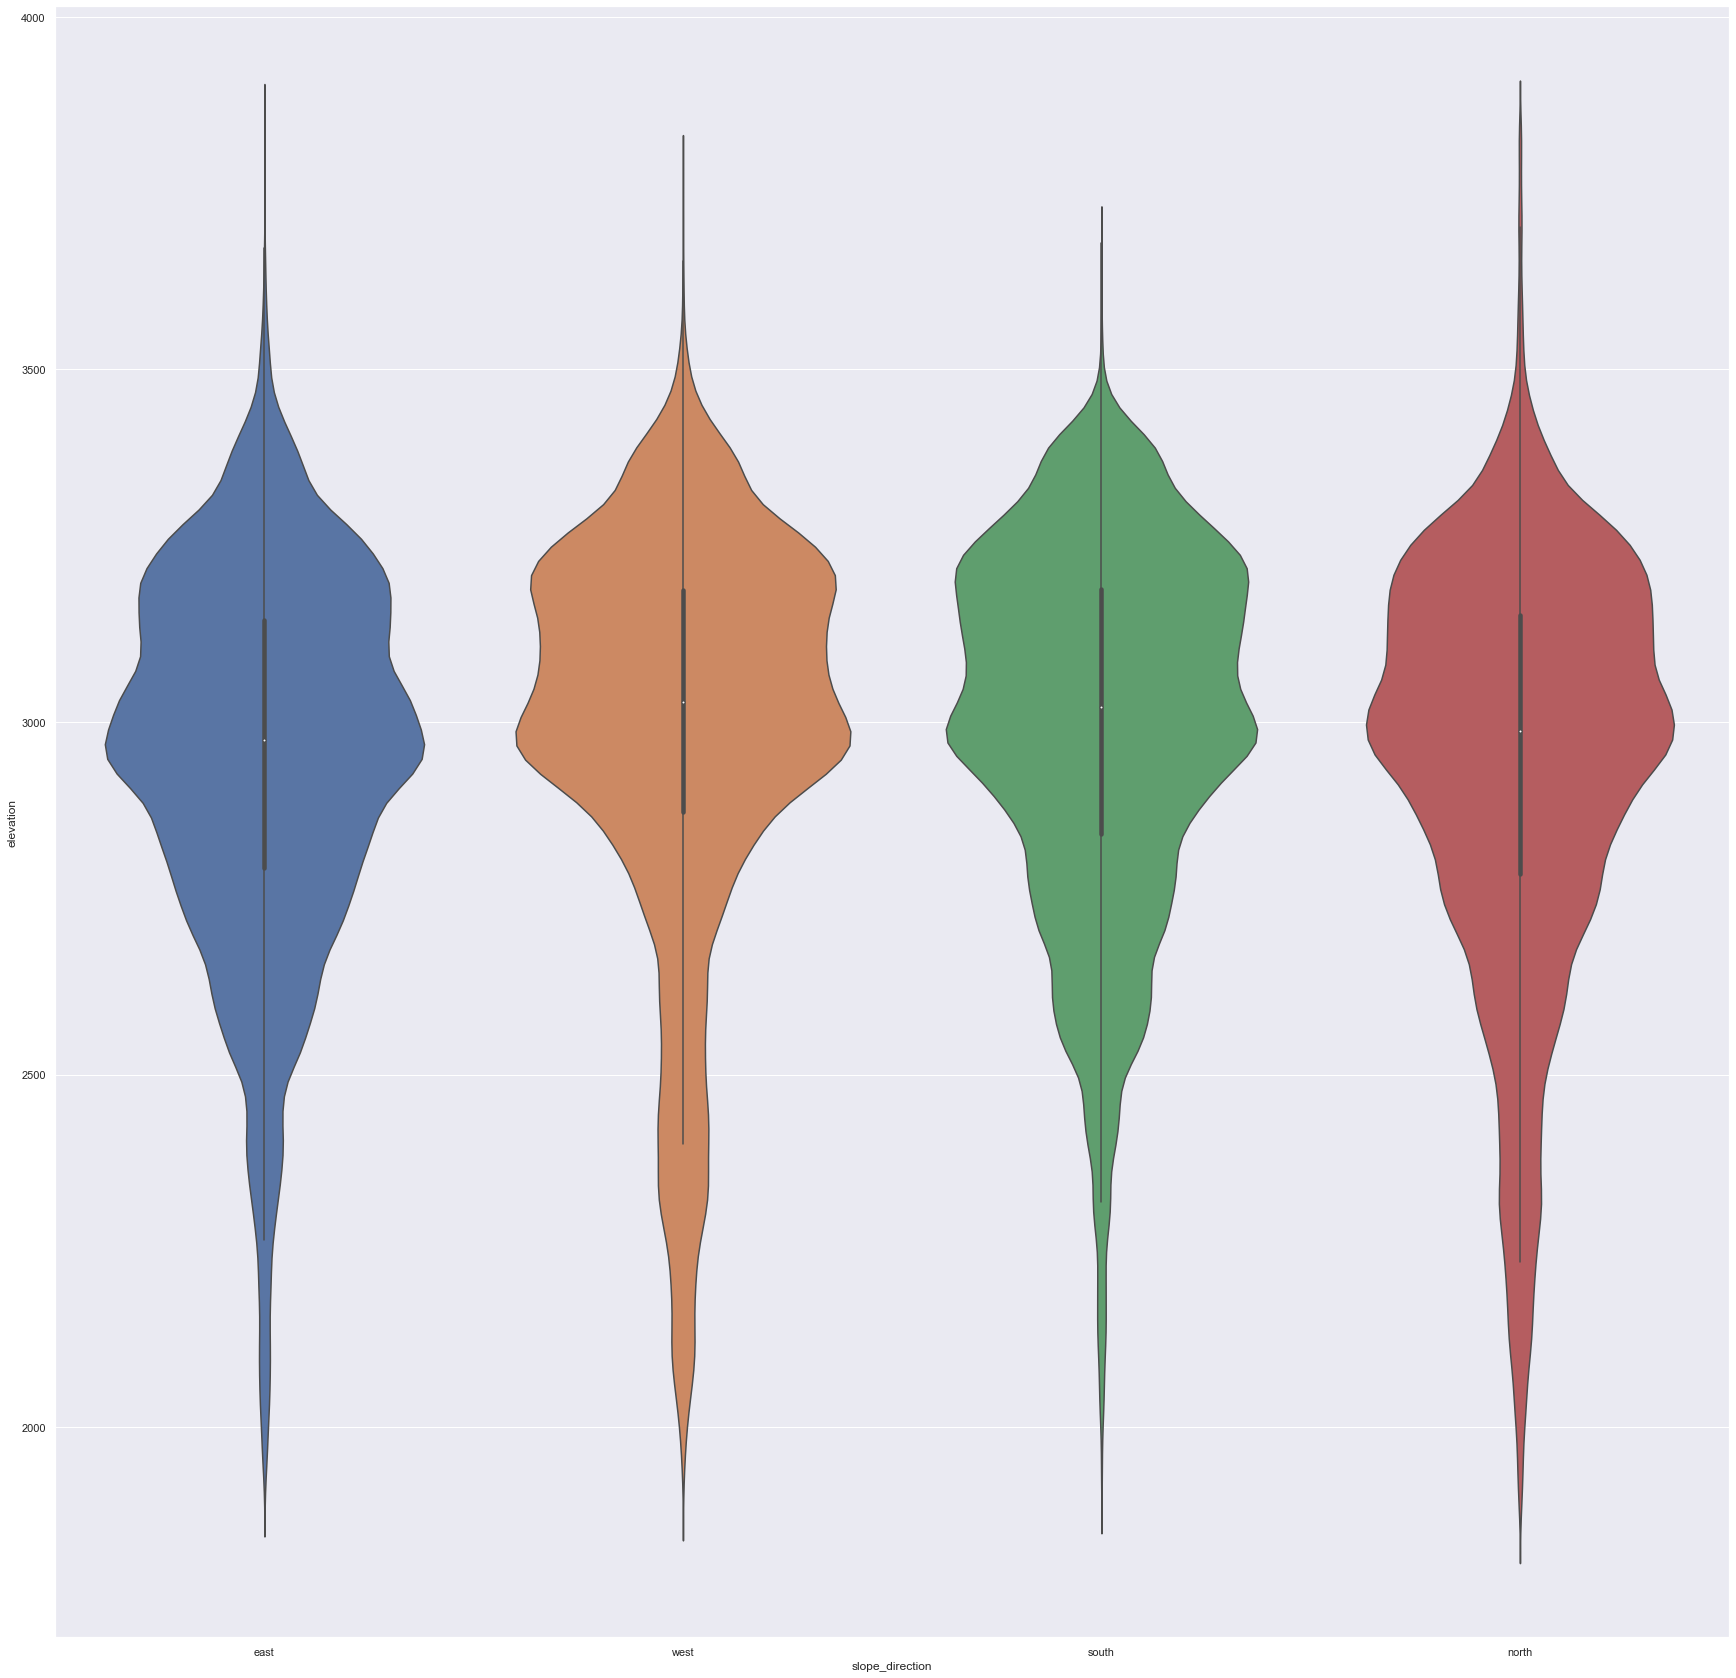

In [297]:
b = df.groupby(['elevation','slope_direction'],as_index=False).count()
b.head()
#sns.violinplot(data=df, y='elevation', x='slope_direction')
#We're pretty evenly north south east west, without much of a difference for elevation in direction. 
sns.violinplot(data = df, slope_direction, )

<AxesSubplot:xlabel='slope', ylabel='Count'>

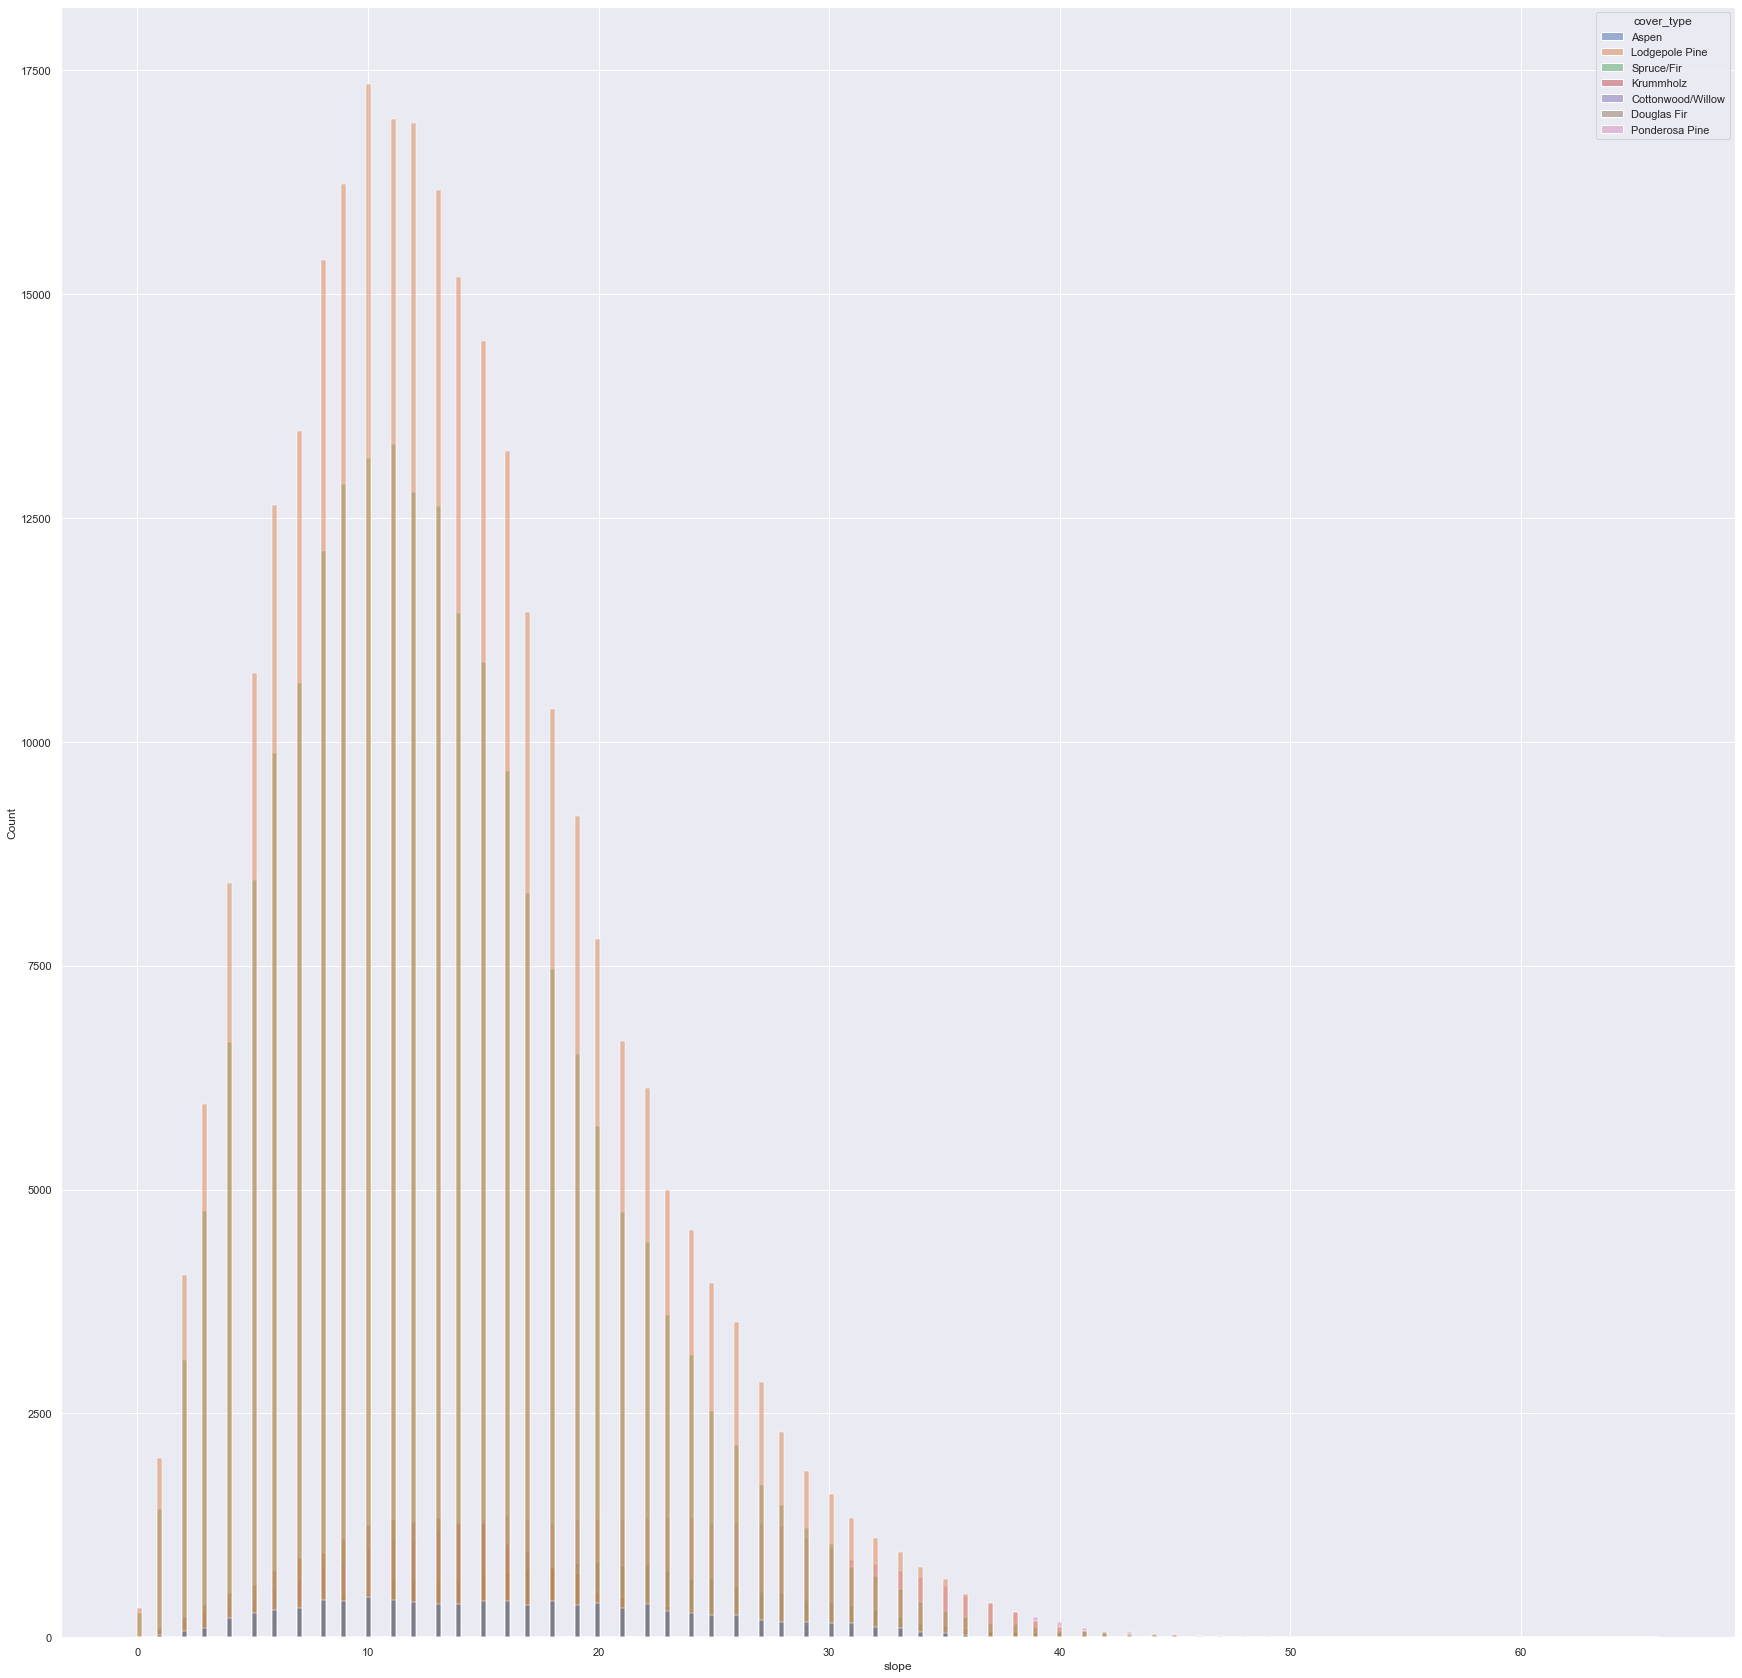

In [299]:
sns.histplot(data=df, x='slope',hue='cover_type')

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581012 entries, 0 to 581011
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   elevation        581012 non-null  int64 
 1   aspect           581012 non-null  int64 
 2   slope            581012 non-null  int64 
 3   h_water          581012 non-null  int64 
 4   v_water          581012 non-null  int64 
 5   h_road           581012 non-null  int64 
 6   shade_9          581012 non-null  int64 
 7   shade_noon       581012 non-null  int64 
 8   shade_3          581012 non-null  int64 
 9   h_fire           581012 non-null  int64 
 10  wilderness       581012 non-null  object
 11  soil_type        581012 non-null  object
 12  cover_type_code  581012 non-null  int64 
 13  cover_type       581012 non-null  object
 14  description      581012 non-null  object
 15  decoding         523883 non-null  object
 16  name             581012 non-null  object
 17  climate_zo

<AxesSubplot:xlabel='h_water', ylabel='elevation'>

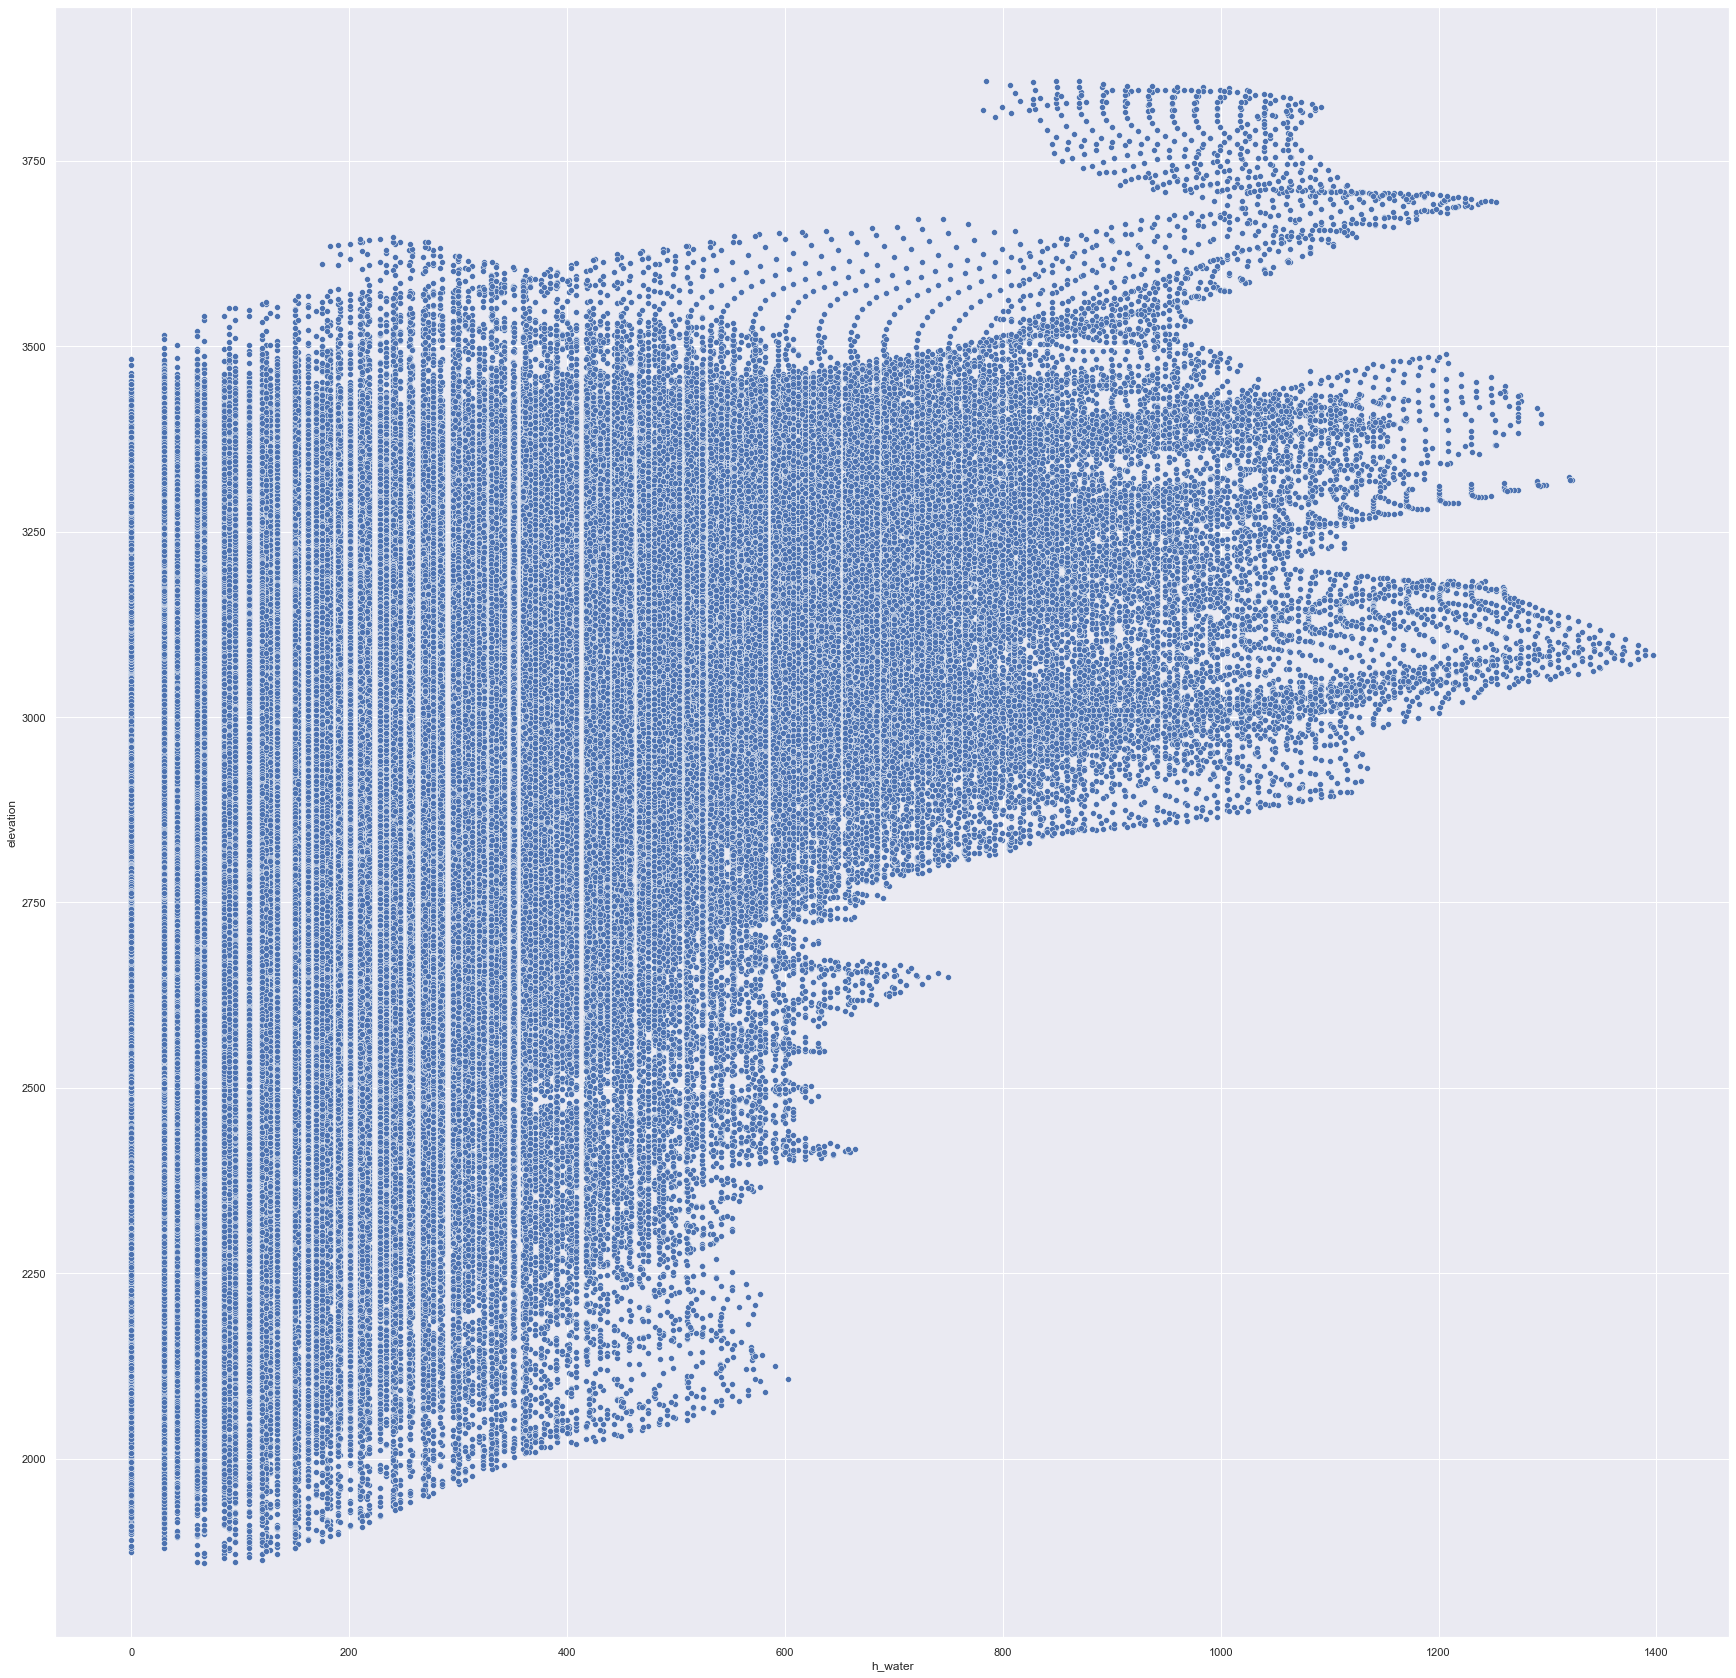

In [304]:
sns.scatterplot(data=df, x='h_water',y='elevation')

In [305]:
from sklearn.linear_model import LogisticRegression


In [417]:
#Ponderosa Pine selection! 
a = df.copy()
display(df.groupby('cover_type').count())
a['tree'] = (a.cover_type == 'Spruce/Fir').astype('int')

,elevation,aspect,slope,h_water,v_water,h_road,shade_9,shade_noon,shade_3,h_fire,wilderness,soil_type,cover_type_code,description,decoding,name,climate_zone,geo_zone,slope_direction
cover_type,,,,,,,,,,,,,,,,,,,
Aspen,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9493,9253,9493,9493,9493,9493
Cottonwood/Willow,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
Douglas Fir,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,17367,17229,17367,17367,17367,17367
Krummholz,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,20158,20510,20510,20510,20510
Lodgepole Pine,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,264044,283301,283301,283301,283301
Ponderosa Pine,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754,35754
Spruce/Fir,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,174698,211840,211840,211840,211840


In [418]:
#Collect X without long strings and cover type 
X = a.loc[:, ~a.columns.isin(['cover_type','name','cover_type_code','description','decoding', 'tree'])]
Y = a.tree

In [419]:
X = a[['elevation','slope']]
Y = a.tree

In [420]:
logreg = LogisticRegression()
logreg.fit(X, Y)
predictions  = logreg.predict(X)

In [421]:
logreg.score(X, Y)

0.6275102751750394

In [422]:
predictions = logreg.predict(X)

In [423]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
display(metrics.confusion_matrix(Y, predictions))
display(precision_score(Y, predictions))
display(recall_score(Y, predictions))
display(f1_score(Y, predictions))


array([[348895,  20277],
       [196144,  15696]])

0.4363272454340756

0.07409365558912387

0.12667616307457638